In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_classification

In [59]:
X, y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1)

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (10000, 2)
y shape: (10000,)


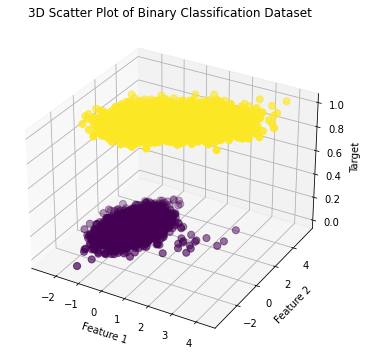

In [3]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

feature1 = X[:, 0]
feature2 = X[:, 1]
ax.scatter(feature1, feature2, y, c=y, cmap='viridis', s=50)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')

plt.title('3D Scatter Plot of Binary Classification Dataset')
plt.show()

In [244]:
class Layer:

    activations = {
        "sigmoid": lambda x: (1 / (1 + np.exp(-x)))
    }

    def __init__(self, num_neuron, input, activation="sigmoid"):
        self.num_neuron = num_neuron
        self.input_shape = input if len(input) == 3 else (1, input[0], input[1])
        self.w = np.random.random((self.input_shape[1], self.num_neuron))
        self.b = np.random.random(( self.num_neuron, 1)) * np.ones((1, self.input_shape[0]))
        self.b = self.b.reshape(self.b.shape[0], self.b.shape[1], 1)
        self.activation = activation
        self.output_shape = (self.input_shape[0], self.num_neuron, 1)

    def output(self, input):
        input = input if len(input.shape) == 3 else input.reshape((1, input.shape[0], input.shape[1]))
        out = self.w.T.dot(input) + self.b
        out = out.reshape((out.shape[1], out.shape[0], out.shape[2]))
        return self.activations.get(self.activation)(out)

class Model:
    def __init__(self):
        self.id = -1
        self.layers = {}
    
    def add_layer(self, num_neuron, input_shape=None, activation="sigmoid"):
        if input_shape == None: input_shape = self.layers[list(self.layers.keys())[-1]].output_shape
        self.id += 1
        self.layers[self.id] = Layer(num_neuron, input_shape, activation)
        
    def forward(self, x):
        out = x
        for i in range(len(self.layers)):
            out = self.layers.get(i).output(out)
        return out

    def layer_output(self, x, id):
        out = x
        for i in range(id+1):
            out = self.layers.get(i).output(out)
        return out
        
    
    def backword(self, x, y):
        gradients = {}
        m = x.shape[0]
        C = len(self.layers)
        dz = self.forward(x) - y

        for i in reversed(range(1, len(self.layers))):
            temp_out = self.layer_output(x, i-1)
            print(self.layers[i].w.shape)
            #print(temp_out.shape)
            gradients['dW' + str(i)] = 1/m * np.dot(dz, temp_out.reshape((temp_out.shape[0], temp_out.shape[2], temp_out.shape[1])))
            #print(gradients['dW' + str(i)].shape)
            if i > 1:
                dz = np.dot(self.layers[i].w, dz) * self.layer_output(x, i-1) * (1 - self.layer_output(x, i-1))
        return gradients


In [245]:
X = X.reshape((X.shape[0], X.shape[1], 1))
X.shape

(10000, 2, 1)

In [246]:
model = Model()

model.add_layer(3, X[0].shape)
model.add_layer(5)
model.add_layer(1)

In [247]:
model.backword(X[0], y[0])

(5, 1)
(3, 5)


{'dW2': array([[[[-0.03577308, -0.03530802, -0.0419891 , -0.03408494,
           -0.03591076]]]]),
 'dW1': array([[[[-0.00226007, -0.00207846, -0.00164027]],
 
         [[-0.00233322, -0.00214573, -0.00169336]],
 
         [[-0.00102306, -0.00094085, -0.0007425 ]],
 
         [[-0.0025127 , -0.00231079, -0.00182362]],
 
         [[-0.0022379 , -0.00205807, -0.00162418]]],
 
 
        [[[-0.00435829, -0.00400808, -0.00316308]],
 
         [[-0.00449934, -0.0041378 , -0.00326545]],
 
         [[-0.00197286, -0.00181433, -0.00143183]],
 
         [[-0.00484545, -0.00445609, -0.00351664]],
 
         [[-0.00431553, -0.00396875, -0.00313204]]],
 
 
        [[[-0.00354258, -0.00325792, -0.00257107]],
 
         [[-0.00365724, -0.00336336, -0.00265428]],
 
         [[-0.00160362, -0.00147476, -0.00116384]],
 
         [[-0.00393857, -0.00362208, -0.00285846]],
 
         [[-0.00350783, -0.00322596, -0.00254585]]],
 
 
        [[[-0.00124243, -0.0011426 , -0.00090171]],
 
         [[-0.0012826

In [138]:
model.forward(X[0])

array([[[0.8682411]]])

In [119]:
model.layers

In [121]:
for layer in model.layers:
    print(layer.w.shape)

(2, 3)
(3, 5)
(5, 1)


In [122]:
model.layers.pop()

In [123]:
model.layers

[<__main__.Layer at 0x26da1687100>, <__main__.Layer at 0x26da18034f0>]

In [128]:
my_dict = {'a': 1, 'b': 2, 'c': 3}

# Get the last key
last_key = list(my_dict.keys())[-1]

print("Last key in the dictionary:", last_key)


Last key in the dictionary: c


In [158]:
import numpy as np

# Creating a sample array with shape (1, 5, 6)
arr = np.random.random((1, 5, 6))

print("Original array shape:", arr.shape)

# Removing the first dimension
new_arr = np.squeeze(arr, axis=0)

print("Modified array shape:", new_arr.shape)

Original array shape: (1, 5, 6)
Modified array shape: (5, 6)
